## Algoritmo Genético
Algoritmo Genético para resolver o Problema das Oito Rainhas.
### Fluxograma
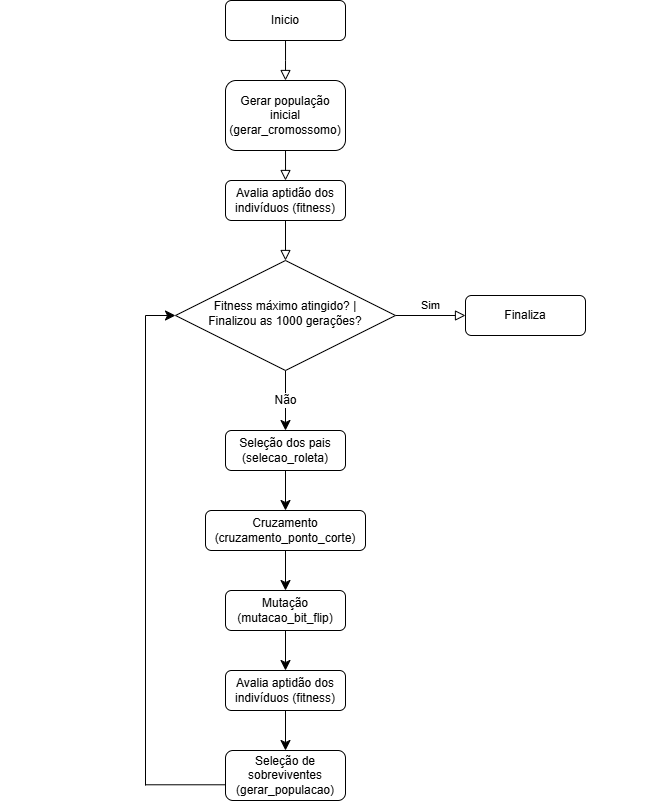

In [71]:
from random import *
import time
import numpy as np

# Constantes
SEED=10 # MUDAR SEED AQUI
TAMANHO_POPULACAO = 20
PROBABILIDADE_MUTACAO = 0.03

TAXA_CRUZAMENTO = 0.8
NUMERO_GERACOES = 1000
n = 8
N = 8

seed(SEED)

state = [0] * N
board = [[0 for _ in range(N)] for _ in range(N)]

def calcularObjetivo(tabuleiro, estado):
	# Calcula o número de pares de rainhas que se atacam no tabuleiro.
	ataques = 0
	for i in range(N):
		# Verificar ataques na mesma linha
		linha = estado[i]
		coluna = i - 1
		while coluna >= 0 and tabuleiro[linha][coluna] != 1:
			coluna -= 1
		if coluna >= 0 and tabuleiro[linha][coluna] == 1:
			ataques += 1
		coluna = i + 1
		while coluna < N and tabuleiro[linha][coluna] != 1:
			coluna += 1
		if coluna < N and tabuleiro[linha][coluna] == 1:
			ataques += 1
		
        # Verificar ataques nas diagonais
		# Superior esquerda
		linha, coluna = estado[i] - 1, i - 1
		while coluna >= 0 and linha >= 0 and tabuleiro[linha][coluna] != 1:
			coluna -= 1
			linha -= 1
		if coluna >= 0 and linha >= 0 and tabuleiro[linha][coluna] == 1:
			ataques += 1
		# Inferior direita
		linha, coluna = estado[i] + 1, i + 1
		while coluna < N and linha < N and tabuleiro[linha][coluna] != 1:
			coluna += 1
			linha += 1
		if coluna < N and linha < N and tabuleiro[linha][coluna] == 1:
			ataques += 1
		# Inferior esquerda
		linha, coluna = estado[i] + 1, i - 1
		while coluna >= 0 and linha < N and tabuleiro[linha][coluna] != 1:
			coluna -= 1
			linha += 1
		if coluna >= 0 and linha < N and tabuleiro[linha][coluna] == 1:
			ataques += 1
		# Superior direita
		linha, coluna = estado[i] - 1, i + 1
		while coluna < N and linha >= 0 and tabuleiro[linha][coluna] != 1:
			coluna += 1
			linha -= 1
		if coluna < N and linha >= 0 and tabuleiro[linha][coluna] == 1:
			ataques += 1
	return int(ataques / 2)


def preencher(tabuleiro, valor):
	# Preenche todo o tabuleiro com um determinado valor.
	for i in range(N):
		for j in range(N):
			tabuleiro[i][j] = valor


def gerarTabuleiro(tabuleiro, estado):
	# Gera um tabuleiro com base na configuração do estado.
	preencher(tabuleiro, 0)
	for i in range(N):
		tabuleiro[estado[i]][i] = 1


# Seleção dos pais
def selecao_roleta(populacao: list[int], valores_fitness: list[int], tamanho_populacao: int) -> list[int]:
    soma_fitness = sum(valores_fitness)
    prob_fitness = [(fitness / soma_fitness) for fitness in valores_fitness]
    posicao_roda = uniform(0, 1)
    prob_cumulativa = 0

    for i in range(tamanho_populacao):
        prob_cumulativa += prob_fitness[i]
        if prob_cumulativa >= posicao_roda:
            return populacao[i]

# Conversor decimal para binário
def decimal_para_binario(cromossomo: list[int]) -> list[int]:
    cromossomo_binario = []
    for num in cromossomo:
        rep_binaria = format(num, '03b')  # Sempre gera exatamente 3 bits
        cromossomo_binario.extend([int(bit) for bit in rep_binaria])
    return cromossomo_binario

# Conversor binário para decimal
def binario_para_decimal(cromossomo: list[int], tamanho: int = 8) -> list[int]:

    cromossomo_decimal = []
    for i in range(0, tamanho * 3, 3):  # Itera em blocos de 3 bits
        valor_decimal = cromossomo[i] * 4 + cromossomo[i+1] * 2 + cromossomo[i+2]
        cromossomo_decimal.append(valor_decimal)

    return cromossomo_decimal

# Mutação
def mutacao_bit_flip(cromossomo: list[int]) -> list[int]:
    # Converter de decimal para binário
    cromossomo_binario = decimal_para_binario(cromossomo)

    # Seleciona um índice aleatório do cromossomo binário
    index = randint(0, len(cromossomo_binario) - 1)

    # Realiza o flip do bit selecionado
    cromossomo_binario[index] = 1 - cromossomo_binario[index]

    # Converter de binário para decimal
    cromossomo_decimal = binario_para_decimal(cromossomo_binario)
    return cromossomo_decimal

# Cruzamento
def cruzamento_ponto_corte(cromossomo1: list[int], cromossomo2: list[int], tamanho: int) -> tuple[list[int], list[int]]:
    ponto = randint(1, tamanho-2)

    filho1 = cromossomo1[:ponto] + cromossomo2[ponto:]
    filho2 = cromossomo2[:ponto] + cromossomo1[ponto:]
    return filho1, filho2

# Cromossomo
def gerar_cromossomo(tamanho: int):
    return sample(range(0, tamanho), tamanho)

# Gerar a população
def gerar_populacao(tamanho_populacao: int, tamanho_cromossomo: int, probabilidade_mutacao: float, taxa_cruzamento: float, antiga_populacao: list[list[int]], valores_fitness: list[list[int]]) -> list[list[int]]:
    nova_populacao = []

    for _ in range(int(tamanho_populacao / 2)):
        pai1 = selecao_roleta(antiga_populacao, valores_fitness, tamanho_populacao)
        pai2 = selecao_roleta(antiga_populacao, valores_fitness, tamanho_populacao)

        # Aplicação da taxa de cruzamento
        if random() <= taxa_cruzamento:
            filho1, filho2 = cruzamento_ponto_corte(pai1, pai2, tamanho_cromossomo)
        else:
            filho1, filho2 = pai1, pai2

        # Aplicação da taxa de mutação
        if random() <= probabilidade_mutacao:
            filho1 = mutacao_bit_flip(filho1)
        if random() <= probabilidade_mutacao:
            filho2 = mutacao_bit_flip(filho2)

        # Nova população
        nova_populacao.append(filho1)
        nova_populacao.append(filho2)
    return nova_populacao

# Fitness
def fitness(n: int, cromossomo: list[int], fitness_max: int) -> int:
    conflitos = 0
    for i in range(n):
        for j in range(i + 1, n):
            if cromossomo[i] == cromossomo[j] or abs(cromossomo[i] - cromossomo[j]) == abs(i - j):
                conflitos += 1
    return int(fitness_max - conflitos)

def queen_problem(n: int):
    fitness_max = (n * (n - 1)) / 2
    geracao = 0
    # Gerar a população inicial
    populacao = [gerar_cromossomo(n) for _ in range(TAMANHO_POPULACAO)]
    # Avalia o valor fitness para cada cromossomo
    valores_fitness = [fitness(n, cromossomo, fitness_max) for cromossomo in populacao]
    
    mais_apto_encontrado = populacao[valores_fitness.index(max(valores_fitness))]

    while geracao != NUMERO_GERACOES and fitness_max != fitness(n, mais_apto_encontrado, fitness_max):
        populacao = gerar_populacao(TAMANHO_POPULACAO, n, PROBABILIDADE_MUTACAO, TAXA_CRUZAMENTO, populacao, valores_fitness)
        valores_fitness = [fitness(n, cromossomo, fitness_max) for cromossomo in populacao]
        
        mais_apto_atual = populacao[valores_fitness.index(max(valores_fitness))]
        
        if fitness(n, mais_apto_atual, fitness_max) > fitness(n, mais_apto_encontrado, fitness_max):
            mais_apto_encontrado = mais_apto_atual
        geracao += 1

    # Checa se tem uma solução na ultima população para mostrar 
    if fitness_max in valores_fitness:
      print(f"Solucionado na geração:{geracao}") 
      solucao = populacao[valores_fitness.index(fitness_max)]
      print(f"Solução encontrada = {solucao} \n")
      gerarTabuleiro(board, estado=solucao)
      rainhas_atacando=calcularObjetivo(board, estado=solucao)
      return geracao, solucao, rainhas_atacando
    else:
      print(f"Nenhuma solução encontrada em {NUMERO_GERACOES} gerações!!") 
      print(f"Solução mais apta encontrada: {mais_apto_encontrado} \n")
      gerarTabuleiro(board, estado=mais_apto_atual)
      rainhas_atacando=calcularObjetivo(board, estado=mais_apto_atual)
      return geracao, mais_apto_encontrado, rainhas_atacando

# Função principal para rodar o experimento
def executar_algoritmo(num_execucoes: int):
    iteracoes = []
    tempos_execucao = []
    solucao_list = []
    ranking_dict = {}
    # Coletar informações
    for _ in range(num_execucoes):
        inicio = time.time()
        iteracoes_ate_parar, solucao_, rainhas_atacando = queen_problem(n)
        fim = time.time()
        
        solucao_list.append(solucao_)
        iteracoes.append(iteracoes_ate_parar)
        tempos_execucao.append(fim - inicio)

        if rainhas_atacando not in ranking_dict:
            ranking_dict[rainhas_atacando] = [(solucao_, iteracoes_ate_parar)]
        else:
            ranking_dict[rainhas_atacando].append((solucao_, iteracoes_ate_parar))
    return iteracoes, tempos_execucao, ranking_dict

iteracoes, tempos_execucao, ranking_dict = executar_algoritmo(50)

# Cálculo das médias e desvio padrão
media_iteracoes = np.mean(iteracoes)
desvio_iteracoes = np.std(iteracoes)
media_tempo = np.mean(tempos_execucao)
desvio_tempo = np.std(tempos_execucao)

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [6, 0, 7, 4, 1, 5, 2, 3] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [2, 4, 6, 1, 5, 7, 0, 3] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [5, 1, 6, 4, 7, 2, 0, 3] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [2, 7, 6, 1, 3, 5, 0, 4] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [3, 1, 7, 5, 2, 0, 4, 6] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [5, 2, 3, 7, 0, 4, 6, 1] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [7, 1, 6, 0, 2, 7, 5, 3] 

Solucionado na geração:184
Solução encontrada = [6, 3, 1, 4, 7, 0, 2, 5] 

Nenhuma solução encontrada em 1000 gerações!!
Solução mais apta encontrada: [2, 4, 7, 0, 3, 6, 0, 5] 

Solucionado na geração:0
Solução encontrada = [4, 6, 1, 5, 2, 0, 3, 7] 

Nenhuma solução encontrada e

### Resultados

In [73]:
count = 0
print('Ranking do 5 melhores')
for key, values in dict(sorted(ranking_dict.items())).items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value[0]} | Gerações necessárias para alcançar o resultado: {value[1]}')
        count += 1

Ranking do 5 melhores
Numero de rainhas se atacando:0 | Array da rainha:[6, 3, 1, 4, 7, 0, 2, 5] | Gerações necessárias para alcançar o resultado: 184
Numero de rainhas se atacando:0 | Array da rainha:[4, 6, 1, 5, 2, 0, 3, 7] | Gerações necessárias para alcançar o resultado: 0
Numero de rainhas se atacando:0 | Array da rainha:[1, 5, 7, 2, 0, 3, 6, 4] | Gerações necessárias para alcançar o resultado: 695
Numero de rainhas se atacando:0 | Array da rainha:[1, 6, 4, 7, 0, 3, 5, 2] | Gerações necessárias para alcançar o resultado: 191
Numero de rainhas se atacando:0 | Array da rainha:[3, 6, 2, 7, 1, 4, 0, 5] | Gerações necessárias para alcançar o resultado: 771


In [75]:
print(f"Média de iterações do número mínimo de iterações: {media_iteracoes}")
print(f"Desvio padrão do número mínimo de iterações: {desvio_iteracoes}")

Média de iterações do número mínimo de iterações: 936.82
Desvio padrão do número mínimo de iterações: 212.8951563563624


In [77]:
print(f"Média de tempo de execução: {media_tempo} segundos") 
print(f"Desvio padrão do tempo de execução: {desvio_tempo} segundos")

Média de tempo de execução: 0.11613942146301269 segundos
Desvio padrão do tempo de execução: 0.026546883987495048 segundos
